<a href="https://colab.research.google.com/github/ItshMoh/Facemask_detection/blob/main/facemask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split


In [ ]:
without_mask_files=os.listdir('/content/drive/MyDrive/my_without_mask_data')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_979.jpg', 'without_mask_981.jpg', 'without_mask_98.jpg', 'without_mask_99.jpg', 'without_mask_982.jpg']
['without_mask_981.jpg', 'without_mask_98.jpg', 'without_mask_99.jpg', 'without_mask_982.jpg', 'without_mask_980.jpg']


In [ ]:
with_mask_files=os.listdir('/content/drive/MyDrive/my_with_mask_data')
print('number of with mask files:',len(with_mask_files))

number of with mask files: 6


In [ ]:
print(with_mask_files[0:5])

['with_mask_99.jpg', 'with_mask_961.jpg', 'with_mask_960.jpg', 'with_mask_98.jpg', 'with_mask_96.jpg']


In [ ]:
print('number of without mask files:',len(without_mask_files))

number of without mask files: 6


In [ ]:
with_mask_labels=[1]*6
without_mask_labels=[0]*6

In [ ]:
print(with_mask_labels[0:5])
print(without_mask_labels[-5:])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
labels=with_mask_labels+without_mask_labels

In [ ]:
print(len(labels))
print(labels[0:5])
print(labels[-5:])

12
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


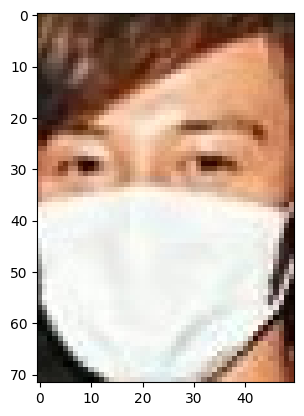

In [ ]:
img =mpimg.imread('/content/drive/MyDrive/with_mask/with_mask_99.jpg')
imgplot= plt.imshow(img)
plt.show()

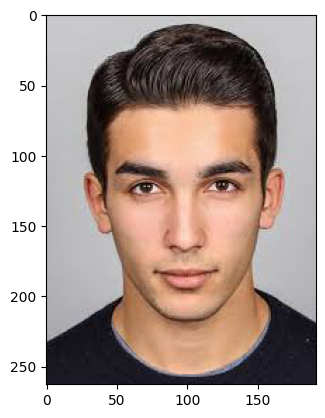

In [ ]:
img=mpimg.imread('/content/drive/MyDrive/without_mask/without_mask_981.jpg')
imgplot= plt.imshow(img)
plt.show()

In [ ]:
with_mask_path=('/content/drive/MyDrive/my_with_mask_data/')
data=[]
for image_files in with_mask_files:
    image=Image.open(with_mask_path + image_files)
    image= image.resize((128,128))
    image=image.convert('RGB')
    image=np.array(image)
    data.append(image)

without_mask_path=('/content/drive/MyDrive/my_without_mask_data/')

for image_files in without_mask_files:
    image=Image.open(without_mask_path + image_files)
    image= image.resize((128,128))
    image=image.convert('RGB')
    image=np.array(image)
    data.append(image)
    

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
X=np.array(data)
Y=np.array(labels)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
X_train.shape

(9, 128, 128, 3)

In [ ]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [ ]:
X_train_scaled[0]

array([[[0.78823529, 0.78823529, 0.79607843],
        [0.78823529, 0.78823529, 0.79607843],
        [0.78823529, 0.78823529, 0.79607843],
        ...,
        [0.79607843, 0.79607843, 0.80392157],
        [0.79607843, 0.79607843, 0.80392157],
        [0.79607843, 0.79607843, 0.80392157]],

       [[0.78823529, 0.78823529, 0.79607843],
        [0.78823529, 0.78823529, 0.79607843],
        [0.78823529, 0.78823529, 0.79607843],
        ...,
        [0.79607843, 0.79607843, 0.80392157],
        [0.79607843, 0.79607843, 0.80392157],
        [0.79607843, 0.79607843, 0.80392157]],

       [[0.78823529, 0.78823529, 0.79607843],
        [0.78823529, 0.78823529, 0.79607843],
        [0.78823529, 0.78823529, 0.79607843],
        ...,
        [0.79607843, 0.79607843, 0.80392157],
        [0.79607843, 0.79607843, 0.80392157],
        [0.79607843, 0.79607843, 0.80392157]],

       ...,

       [[0.10196078, 0.09411765, 0.1372549 ],
        [0.10196078, 0.09411765, 0.1372549 ],
        [0.10588235, 0

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,MaxPooling2D,Dropout,Conv2D,Flatten

In [ ]:
model=Sequential()

model.add(Conv2D(64,kernel_size=(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(2,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(X_train_scaled,Y_train,epochs=2)

Epoch 1/2
1/1 [==============================] - 0s 34ms/step - loss: 0.4046 - accuracy: 0.8889
Epoch 2/2
1/1 [==============================] - 0s 21ms/step - loss: 0.2537 - accuracy: 1.0000


In [ ]:
loss,accuracy=model.evaluate(X_test_scaled,Y_test)

1/1 [==============================] - 0s 29ms/step - loss: 0.3256 - accuracy: 1.0000


prdictive **system**

give the path name:/content/drive/MyDrive/with_mask/with_mask_1000.jpg


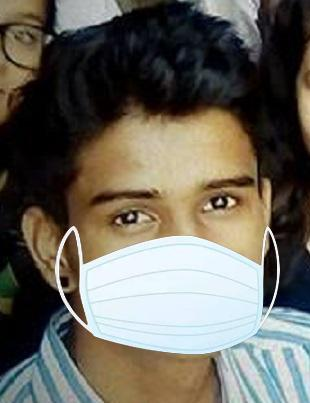

1/1 [==============================] - 0s 38ms/step
[[0.6020536 0.628995 ]]
1
The person is not  wearing a mask


In [ ]:
input_image_path=input('give the path name:')

input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)

image_resize=cv2.resize(input_image,(128,128))
image_scaled=image_resize/255

image=np.reshape(image_scaled,[1,128,128,3])


prediction=model.predict(image)

print(prediction)
predi_label=np.argmax(prediction)
print(predi_label)

if predi_label==1 :
  print("The person is not  wearing a mask")
else:
    print("The person is  wearing a mask")